## Project 2 - Stochastic Gradient Descent (MNIST)

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train=X_train/255
X_test =X_test/255

#y_test

In [4]:
N_train, numRows, numCols = X_train.shape
X_train = np.reshape(X_train,(N_train,numRows*numCols))
#numRows
#X_train

In [5]:
y_train = pd.get_dummies(y_train).values
#y_train

In [6]:
def softmax_function(k):
    return np.exp(k) / np.sum(np.exp(k),axis=0)

def cross_entropy_multi(p,q):
    return -np.vdot(p,np.log(q))

def L(beta,X,y):
    N = X.shape[0]
    out = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        yi_pred = softmax_function(beta@xiHat) #s(u)
        out += cross_entropy_multi(yi,yi_pred)
    return out / N

In [7]:
def stochastic(X,y,size,a,e):
    epochs = e
    alpha = a
    N, d = X.shape
    X = np.insert(X,0,1,axis=1) #augmented matrix
    K = y.shape[1] 
    
    batch_size = size
    
    beta = np.zeros((K,d+1))
    L_vals = []
    
    for epoch in range(epochs):
        L_val = L(beta,X,y) 
        L_vals.append(L_val)
        
        print('epoch  = ' + str(epoch) + ',  Loss = ' + str(L_val))
        
        prm = np.random.permutation(N)
        batch_idx = 0
        
        for start in range(0,N,batch_size):
            
            stop = start + batch_size 
            stop = min(stop, N)
            
            n_ex = stop - start 
        
            for i in prm[start:stop]:
                xiHat = X[i]
                yi = y[i]
                
                yi_pred = softmax_function(beta @ xiHat)
                
                grad = np.outer(yi_pred - yi, xiHat)

            grad = grad / n_ex
            beta = beta - alpha*grad 
            
            batch_idx += 1
            
    
    return beta, L_vals
    

In [12]:
beta, L_vals = stochastic(X_train,y_train,5,0.005,20)

epoch  = 0,  Loss = 2.3025850929954172
epoch  = 1,  Loss = 0.5760699682092465
epoch  = 2,  Loss = 0.46911915077517896
epoch  = 3,  Loss = 0.42418265336561345
epoch  = 4,  Loss = 0.39907703450878407
epoch  = 5,  Loss = 0.3811733931426591
epoch  = 6,  Loss = 0.37151246840762214
epoch  = 7,  Loss = 0.3592622901300646
epoch  = 8,  Loss = 0.35120937815549597
epoch  = 9,  Loss = 0.34528312243608666
epoch  = 10,  Loss = 0.339179690485083
epoch  = 11,  Loss = 0.3351038395721738
epoch  = 12,  Loss = 0.3313129726800048
epoch  = 13,  Loss = 0.32632697640111236
epoch  = 14,  Loss = 0.3233586645040311
epoch  = 15,  Loss = 0.3224564439866411
epoch  = 16,  Loss = 0.3185968916283271
epoch  = 17,  Loss = 0.315699554213495
epoch  = 18,  Loss = 0.31493267624108484
epoch  = 19,  Loss = 0.31235792867956313


Text(0, 0.5, 'Values of Objective Function')

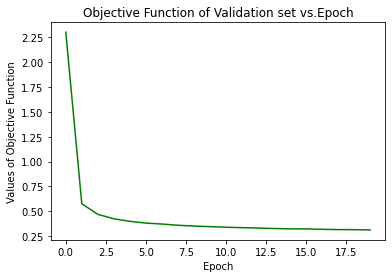

In [19]:
plt.plot(L_vals, color= "green")
plt.title("Objective Function of Validation set vs.Epoch")
plt.xlabel('Epoch')
plt.ylabel('Values of Objective Function')